# **Machine Learning from the Titanic** #
Authors: Alberto De Saint Malo, Diego De Saint Malo, Raul Rodriguez, Gam San

This Jupyter notebook seeks to illustrate the Exploratory Data Analysis and model creation to predict the Titanic
passengers which survived the tragedy.

We will be basing this project off one of the most popular beginner competitions for machine learning enthusiasts:
* **https://www.kaggle.com/c/titanic**

**Following the Kaggle Competition's challenge proposal, our specific goal is:**

_"To build a predictive model that answers the question:
“what sorts of people were more likely to survive?”
using passenger data (ie name, age, gender, socio-economic class, etc)."_

**Project Output**

Output may be viewed at the end of this Jupyter Notebook or using the python file `main.py`
-_under correct setup_- which will output the results.

***

# **0. Library Imports** ##

In [754]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import numpy as np
import sklearn
import missingno

***
# **1. Data Overview** ##
Let us take a view at the data provided by the Kaggle Competition

In [755]:
train_df = pd.read_csv('Raw Data/train.csv')
test_df = pd.read_csv('Raw Data/test.csv')

test_df.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

## **Features Dictionary** ###

<table>

<tr> <td> <b>Variable</b> </td> <td> <b>Definition</b> </td> <td> <b>Key</b> </td> </tr>
<tr> <td>survival</td> <td>survival</td> <td>0 = No, 1 = Yes</td> </tr>
<tr> <td>pclass</td> <td>Ticket class</td> <td>1 = 1st, 2 = 2nd, 3 = 3rd</td> </tr>
<tr> <td>sex</td> <td>Sex</td> <td>male, female</td> </tr>
<tr> <td>Age</td> <td>Age in years</td> <td> <i>continous</i> </td> </tr>
<tr> <td>sibsp</td> <td># of siblings / spouses aboard the Titanic</td> <td>0, 1, 2, ...</td> </tr>
<tr> <td>parch</td> <td># of parents / children aboard the Titanic</td> <td>0, 1, 2, ...</td> </tr>
<tr> <td>ticket</td> <td>Ticket number</td> <td></td> </tr>
<tr> <td>fare</td> <td>Passenger fare</td> <td><i>continous</i></td> </tr>
<tr> <td>cabin</td> <td>Cabin number</td> <td></td> </tr>
<tr> <td>cabin</td> <td>Port of Embarkation</td> <td>C = Cherbourg, Q = Queenstown, S = Southampton</td> </tr>

</table>

// From the Kaggle Competiton Website

## **Variable Notes** ###

* **pclass**: A proxy for socio-economic status (SES)
    * 1st = Upper
    * 2nd = Middle
    * 3rd = Lower
* **age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* **sibsp**: The dataset defines family relations in this way...
* **Sibling**: brother, sister, stepbrother, stepsister
* **Spouse**: husband, wife (mistresses and fiancés were ignored)
* **parch**: _The dataset defines family relations in this way..._
    * Parent = mother, father
    * Child = daughter, son, stepdaughter, stepson
    * Some children travelled only with a nanny, therefore parch=0 for them.

Let's check some statistics regarding our training data

In [756]:
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

## **Key Observations**
* **Samples:** 891 rows
* **Survival Rate:** ~39%
* **Avg socioeconomic status:** 2nd Class
* **Age Range:** Toddlers (0.4) - 80yrs/old
* **Fare Range($):** 32 - 512

***
# **2. Exploratory Data Analysis** ##
Before we delve deeper into the data let us first check out which features contain missing values.

# **Survived**
Let's zoom in on the survived passengers and see if there is any initial correlation to any other features:
***
## **a) Overall**

In [757]:
# specifies the parameters of our graphs
sns.color_palette("pastel")

plt.style.use({'figure.facecolor':'white'})
fig = plt.figure(figsize=(18,6), dpi=1600)
alpha=alpha_scatterplot = 0.2
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.
train_df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax1.set_xlim(-1, 2)
plt.title("Distribution of Survival, (1 = Survived)")

plt.subplot2grid((2,3),(0,1))
plt.scatter(train_df.Survived, train_df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs
plt.grid(visible=True, which='major', axis='y')
plt.title("Survival by Age,  (1 = Survived)")

# ax3 = plt.subplot2grid((2,3),(0,2))
# train_df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
# ax3.set_ylim(-1, len(train_df.Pclass.value_counts()))
# plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
train_df.Age[train_df.Pclass == 1].plot(kind='kde')
train_df.Age[train_df.Pclass == 2].plot(kind='kde')
train_df.Age[train_df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')


Let's dive deeper into each feature and see what correlations we find
## **b) Class**

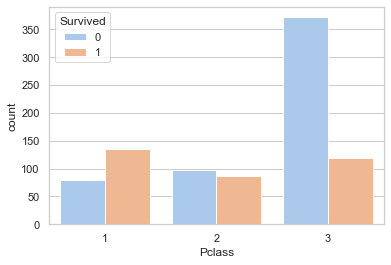

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
3    491
1    216
2    184
Name: Pclass, dtype: int64


In [758]:
sns.countplot(x="Pclass", hue="Survived", data=train_df, palette="pastel")
plt.show()
print(train_df["Survived"].groupby(train_df["Pclass"]).mean())
print(train_df["Pclass"].value_counts())

Observations:
* Higher class passengers had a greater chance of survival
***
## **c) Sex**

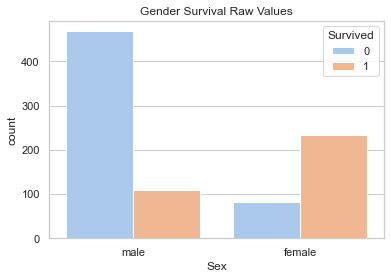

Survival Ratio: 
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Raw Value counts of genders:
male      577
female    314
Name: Sex, dtype: int64


In [759]:
# Countplot visualization
sns.countplot(x="Sex", hue="Survived", data=train_df, palette="pastel").set(title="Gender Survival Raw Values")
plt.show()

print("Survival Ratio: ")
group_df = train_df["Survived"].groupby(train_df["Sex"]).mean()
print(group_df)

print("\n\nRaw Value counts of genders:")
print(train_df["Sex"].value_counts())

It seems like females had a higher chance of survival than men. Let's try and put them together to see
if this phenomenon finds anything together

***
## **d) Putting both Sex and Class Together**

In [760]:
fig = plt.figure(figsize=(20,7), dpi=1600)

alpha_level = 0.60

ax1=fig.add_subplot(141)
fem_highclass = train_df.Survived[train_df.Sex == 'female'][train_df.Pclass != 3].value_counts()
fem_highclass.plot(kind='bar', label='fem, highClass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(fem_highclass))
plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = train_df.Survived[train_df.Sex == 'female'][train_df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='fem, lowClass', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')
plt.title("Age and Gender Plots, (highClass == 3) (lowClass != 3)")

ax3=fig.add_subplot(144, sharey=ax1)
male_highclass = train_df.Survived[train_df.Sex == 'male'][train_df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highClass', alpha=alpha_level, color='steelblue')
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

ax4=fig.add_subplot(143, sharey=ax1)
male_lowclass = train_df.Survived[train_df.Sex == 'male'][train_df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, lowClass',color='lightblue', alpha=alpha_level)
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')


We can see that for the females, as their class lowers, so does their survival rate. Moreover, this also happens with the males

***
## **e) Names**
Let's now turn our attention onto the names of the passengers and see if there's any correlation to their survival rate

In [761]:
train_df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

We can take a look at the names and find that every sample has a title for their name!

**Example**
* Braund, **Mr**. Owen Harris
* Heikkinen, **Miss**. Laina
* Oliva y Ocana, **Dona**. Fermina
* Peter, **Master**. Michael J

First, let's see how many different titles we have

In [762]:
# Get titles
train_df["Title"] = train_df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

print(train_df["Title"].value_counts())

fig = plt.figure(figsize=(18,5), dpi=1600)
sns.set_theme(style="whitegrid")
sns.countplot(data=train_df, x='Title').set(title='Passenger Extracted Title Count')

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64


[Text(0.5, 1.0, 'Passenger Extracted Title Count')]

We have a vast amount of Mr, Mrs, Miss, and Master. However, we have some values which don't appear much.
Let's see if there is any correlation to the survival rate with these extracted Titles.


Title
the Countess    1.000000
Mlle            1.000000
Sir             1.000000
Ms              1.000000
Lady            1.000000
Mme             1.000000
Mrs             0.792000
Miss            0.697802
Master          0.575000
Col             0.500000
Major           0.500000
Dr              0.428571
Mr              0.156673
Jonkheer        0.000000
Rev             0.000000
Don             0.000000
Capt            0.000000
Name: Survived, dtype: float64
1.0


[Text(0.5, 1.0, 'Title to Survival Rate')]

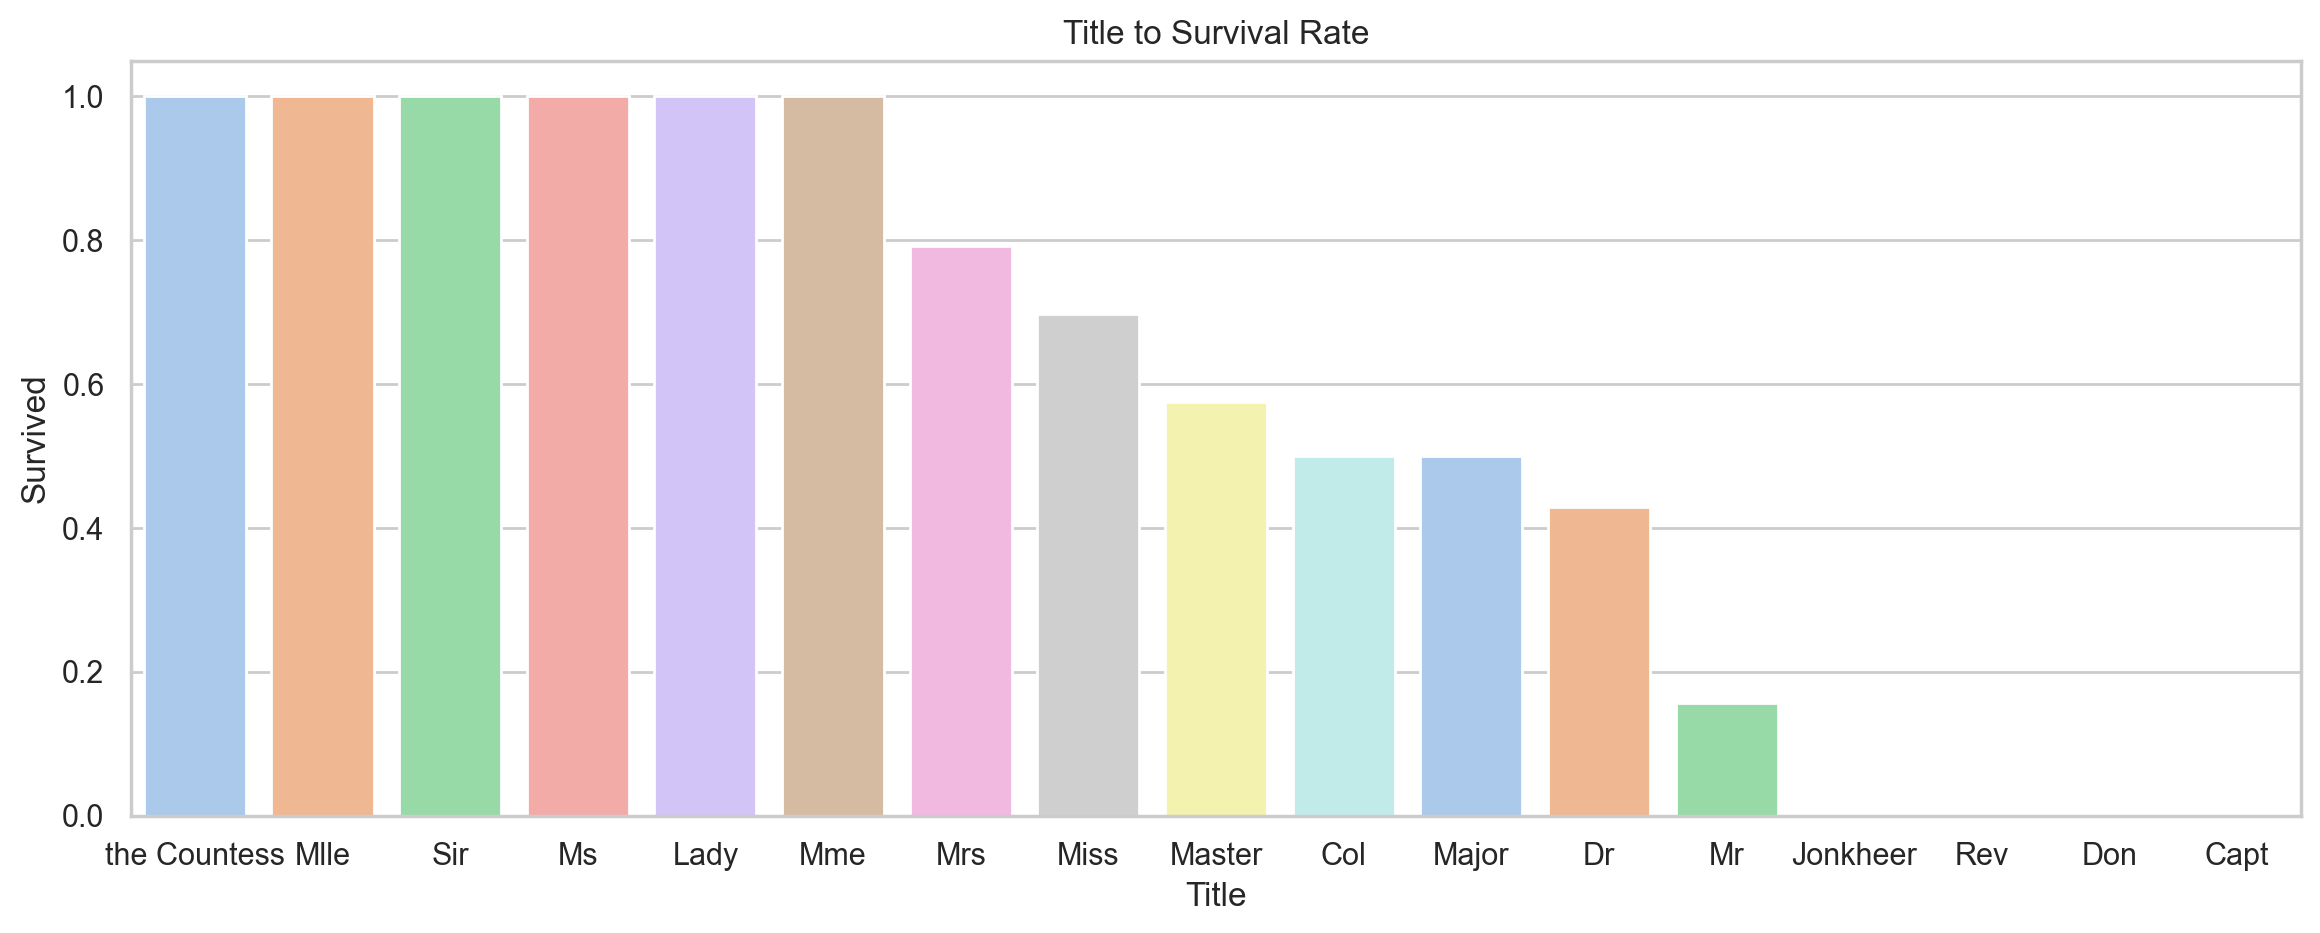

In [763]:
# Print the Survival rates by title
print(train_df["Survived"].groupby(train_df["Title"]).mean().sort_values(ascending=False))

group_df = train_df["Survived"].groupby(train_df["Title"]).mean().sort_values(ascending=False)

print(group_df[0])

group_df = group_df.to_frame().reset_index()
sns.set(rc = {'figure.figsize':(14,5), "figure.dpi":200})
sns.set_theme(style="whitegrid")
sns.barplot(data=group_df, x='Title', y='Survived', palette="pastel").set(title='Title to Survival Rate')

We can see how certain names such as **the Countess, Mlle, Sir, etc..** have a good correlation to survival rate than others

### **Let's cut off the values in the following manner:**

* **Higher Title ( > 50% ):** the Countess, Mlle, Lady, Ms , Sir, Mme, Mrs, Miss, Master
* **Neutral Title ( == 50% ):** Col, Major
* **Lessser Title ( < 50% ):** Dr, Mr, Rev, Jonkheer, Don, Capt
***
## **f) Age**
Let's turn our attention to the age of our passengers and if there's anything we can learn from it

C:\Users\beto7\OneDrive\Documents\Google Drive\FSU\Classes\06. Fall 2021\CIS 4930\Titanic Final Project\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\beto7\OneDrive\Documents\Google Drive\FSU\Classes\06. Fall 2021\CIS 4930\Titanic Final Project\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


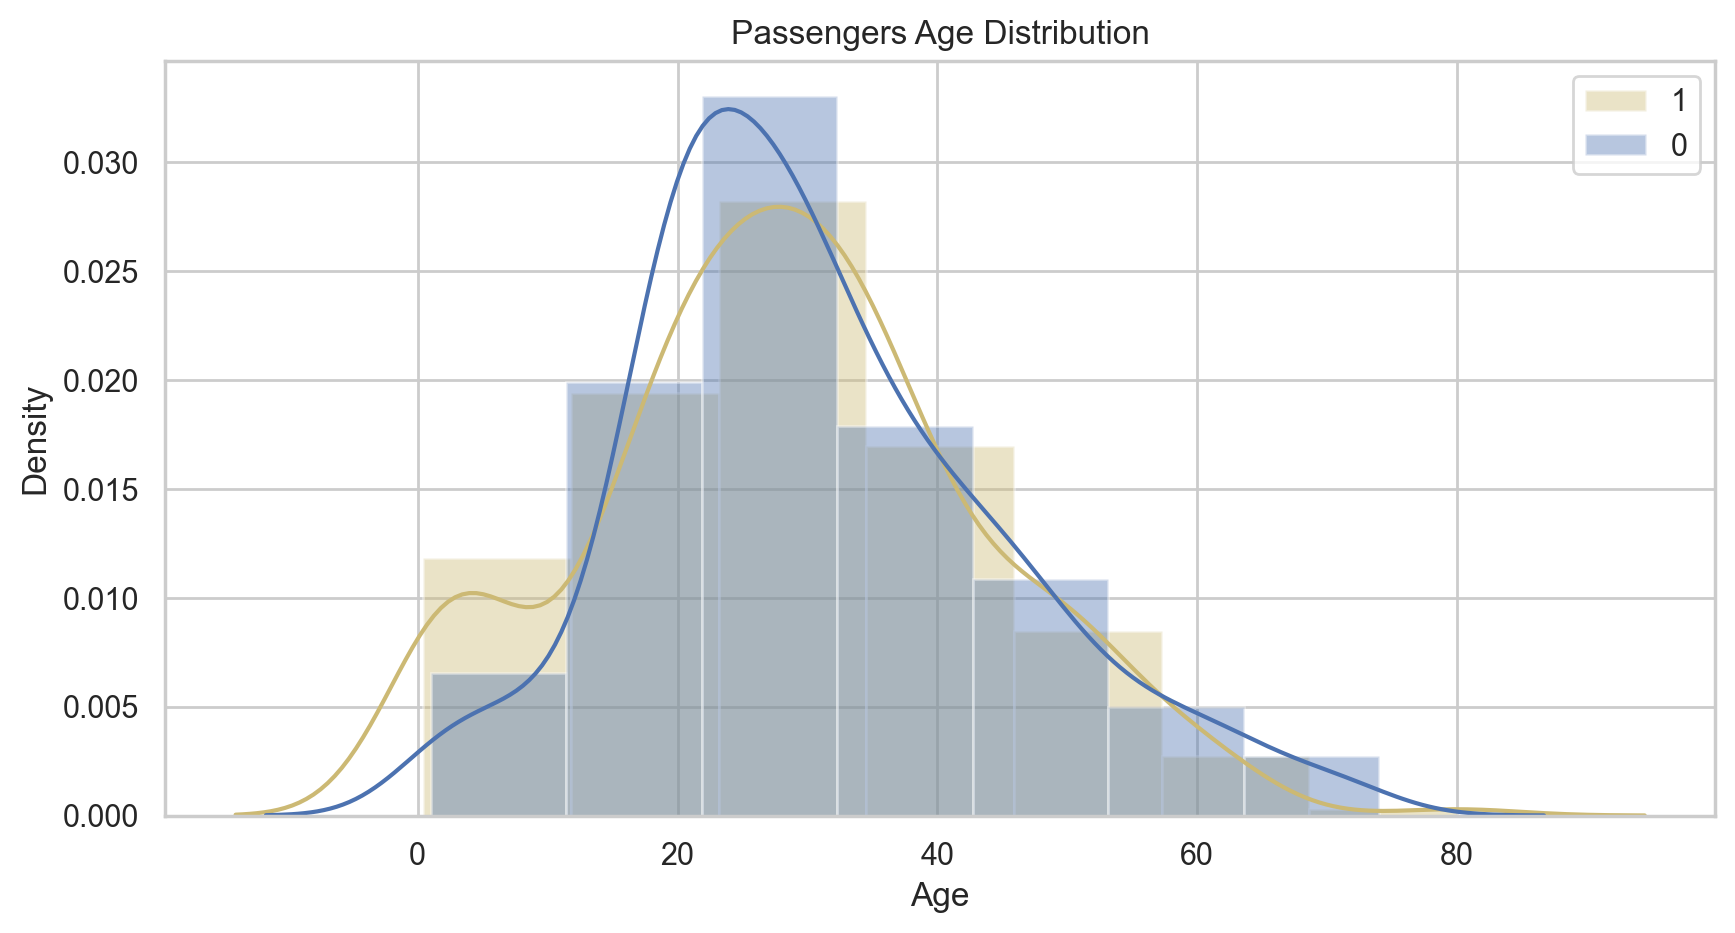

In [764]:
sns.set(rc = {'figure.figsize':(10,5), "figure.dpi":200})
sns.set(font_scale = 5)
sns.set_theme(style="whitegrid")
sns.distplot(train_df[train_df.Survived==1]["Age"],color="y", bins=7, label="1")
sns.distplot(train_df[train_df.Survived==0]["Age"], bins=7, label="0")
plt.legend()
plt.title("Passengers Age Distribution")
plt.show()

Age seems to have a correlation with the survival rate, we will use it for our computations. However, we must still
deal with the missing values. We will do that later in the feature engineering.
***
## **g) Fare**

<AxesSubplot:xlabel='Fare', ylabel='Count'>

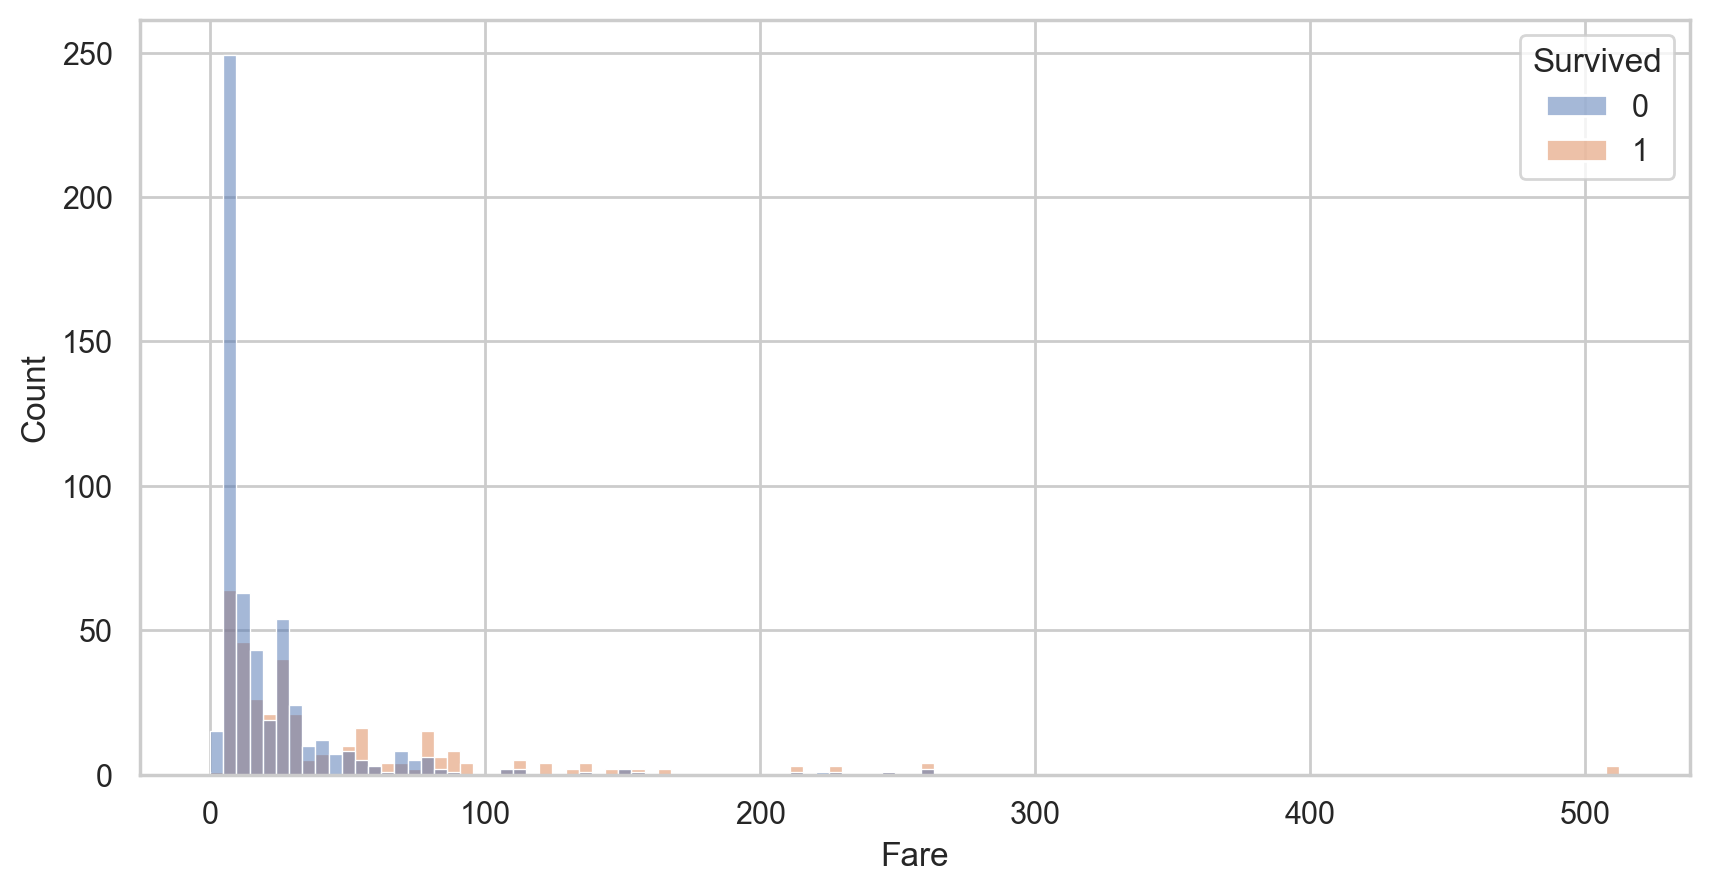

In [765]:
sns.set(rc = {'figure.figsize':(10,5), "figure.dpi":200})
sns.set(font_scale = 5)
sns.set_theme(style="whitegrid")

sns.histplot(data=train_df, x='Fare', hue='Survived')


It seems that higher fares seem to have a correlation with a higher survival rate
***
# **2. Feature Engineering** #
The first thing that we must check before engineering any features is how many missing values we have in each feature

In [766]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

<AxesSubplot:>

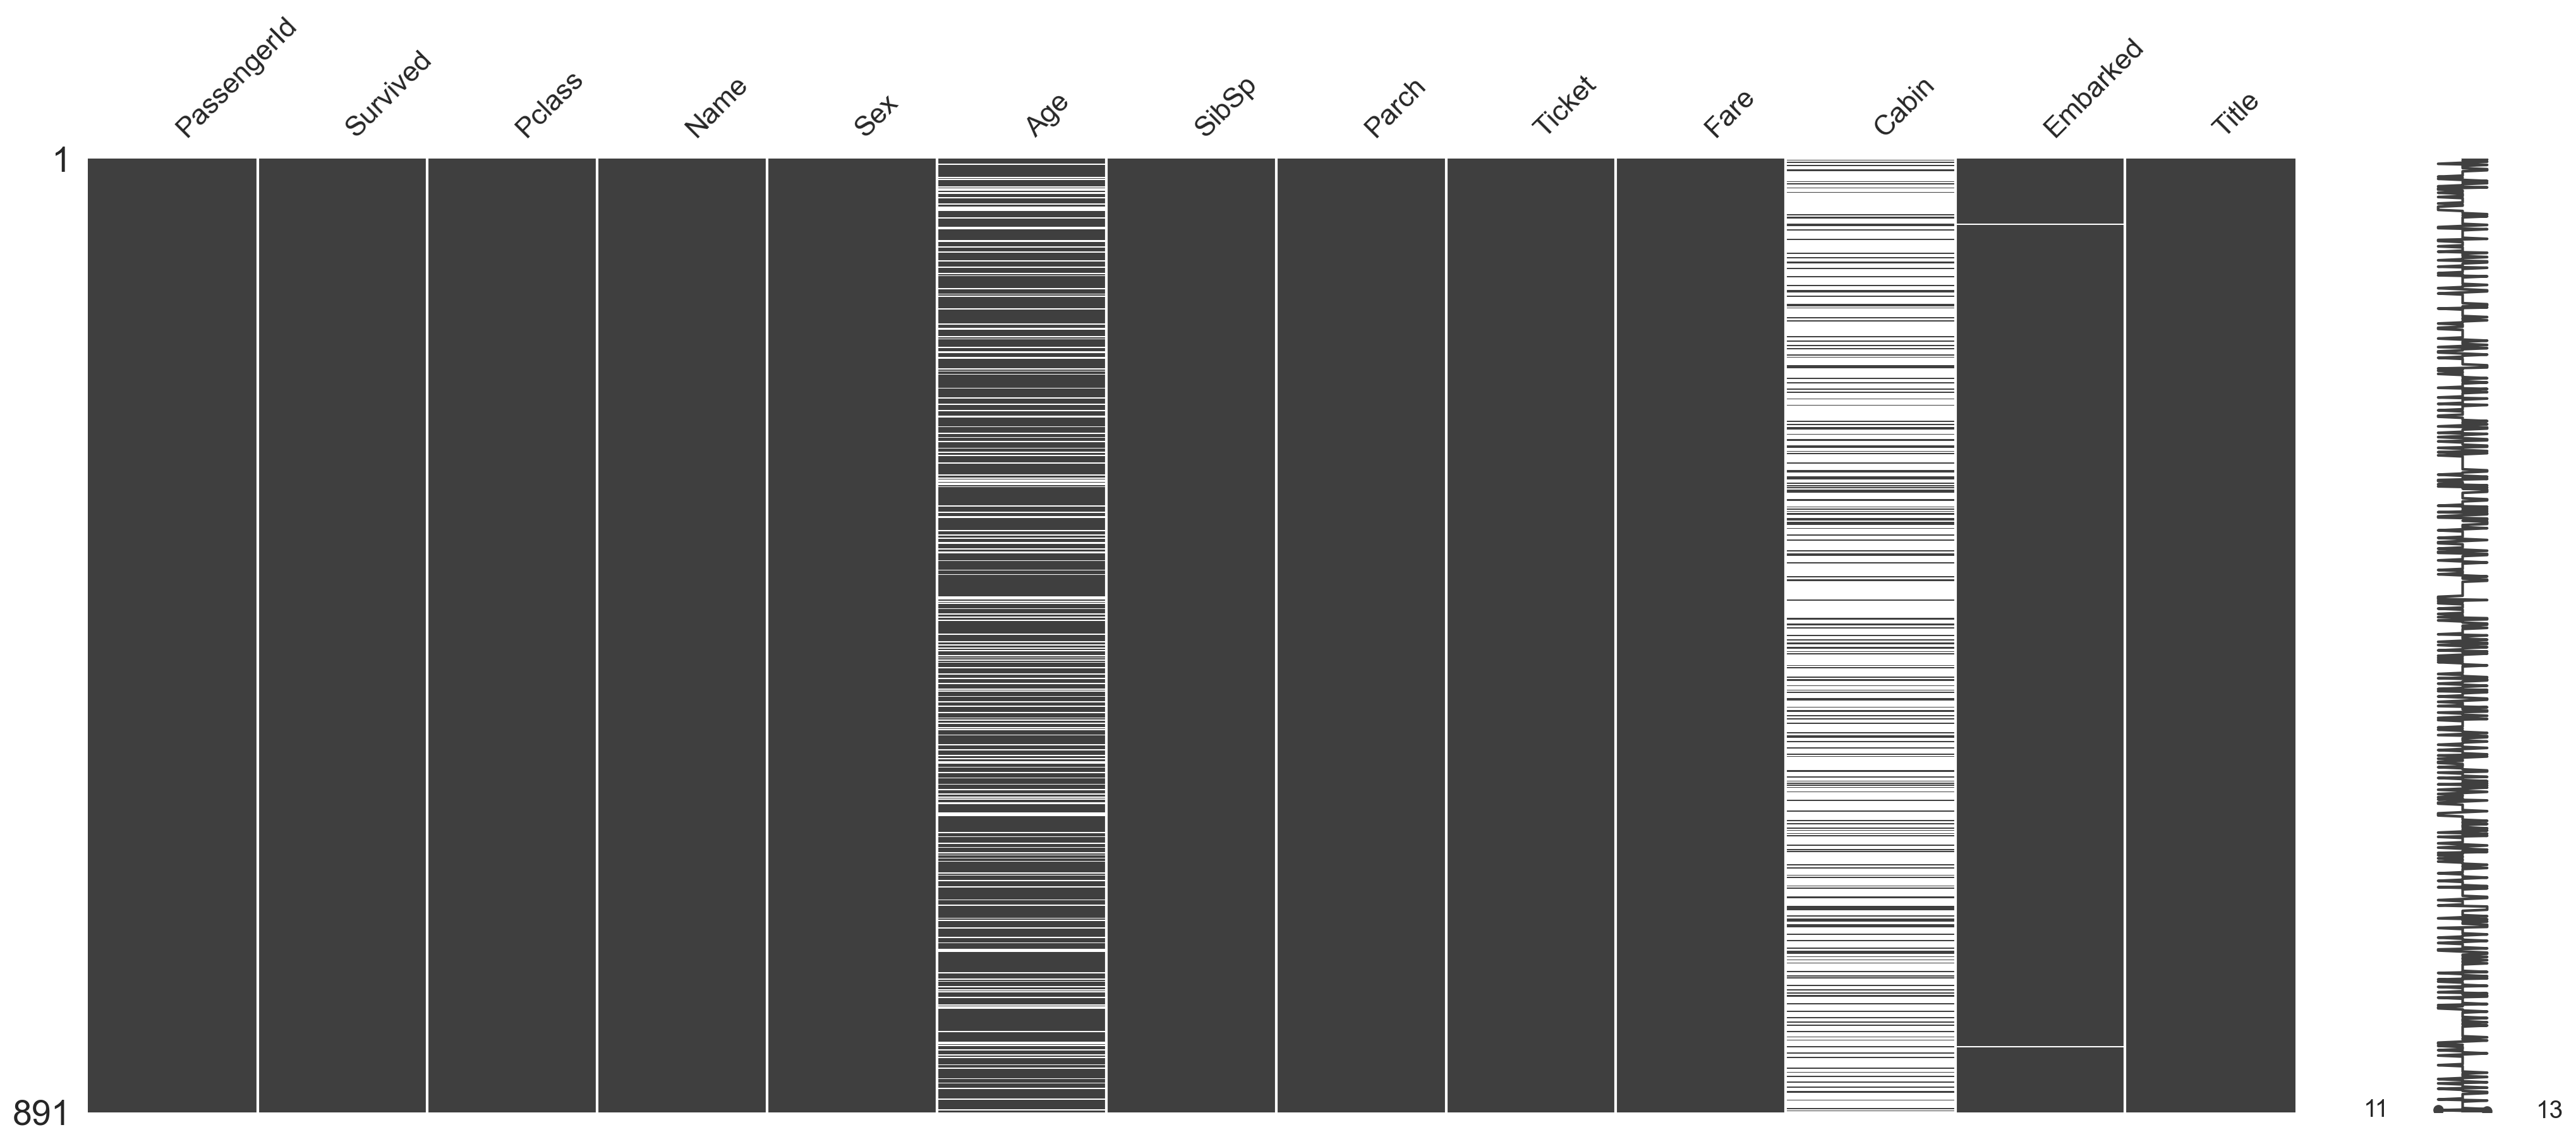

In [767]:
missingno.matrix(train_df)

From this data it seems that **Age** may be usable with some sort of feature engineered to fill in the gaps.

On the other hand, **Cabin** seems completely unusable for our analysis as over **77%** of the column is missing.


In [768]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

train_df = pd.read_csv('Raw Data/train.csv')
test_df = pd.read_csv('Raw Data/test.csv')
ans_df = pd.read_csv('Raw Data/gender_submission.csv')
ans_df = ans_df.drop(['PassengerId'], axis=1)

imp_age = IterativeImputer(max_iter=150, random_state=34, n_nearest_features=3)
imp_fare = IterativeImputer(max_iter=150, random_state=34, n_nearest_features=3)
imp_embarked = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

target_df = train_df['Survived']

# Impute Age on both dataframes
train_df["Age"] = np.round(imp_age.fit_transform(train_df[["Age"]]))
test_df["Age"] = np.round(imp_age.fit_transform(test_df[["Age"]]))

# Impute the Embarked on both dataframes
train_df["Embarked"] = imp_embarked.fit_transform(train_df[["Embarked"]])
test_df["Embarked"] = imp_embarked.fit_transform(test_df[["Embarked"]])

# Impute the Embarked on both dataframes
train_df["Fare"] = imp_fare.fit_transform(train_df[["Fare"]])
test_df["Fare"] = imp_fare.fit_transform(test_df[["Fare"]])

# Create the Family Size Feature
train_df["FamSize"] = train_df["SibSp"] + train_df["Parch"]
test_df["FamSize"] = test_df["SibSp"] + test_df["Parch"]

# Titles
train_df["Title"] = train_df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
test_df["Title"] = test_df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

combined_df = train_df.append(test_df)
combined_df.reset_index(inplace=True)

combined_df = pd.get_dummies(columns=["Pclass", "Sex", "Embarked", "FamSize", "Title"], data=combined_df, drop_first=False)

train_df = combined_df.iloc[:891]
test_df = combined_df.iloc[891:]

train_df = train_df.drop(['Name', 'Survived', 'PassengerId', 'index', 'Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Name','Survived' ,'PassengerId', 'index', 'Ticket', 'Cabin'], axis=1)

In [769]:
# scaler = MinMaxScaler()
# train_df = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)

In [770]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

logreg = LogisticRegression(max_iter=10000)
randomForest = RandomForestClassifier()
kneighbors = KNeighborsClassifier()
decisionTree = tree.DecisionTreeClassifier()

models = [logreg ,randomForest, kneighbors, decisionTree]

In [771]:
from sklearn.metrics import accuracy_score
ans_df = pd.read_csv('Raw Data/gender_submission.csv')
ans_df = ans_df.drop(['PassengerId'], axis=1)

ans_numpy_arr = ans_df.values
ans_numpy_arr = ans_numpy_arr.flatten()

def getAccuracy(models, target_df, test_df, ans_numpy_arr):
    for x in models:
        x.fit(train_df, target_df)
        predict = x.predict(test_df)
        ans = accuracy_score(ans_numpy_arr, predict)
        print('Accuracy of : {0}'.format(x.__class__))
        print(ans)

getAccuracy(models, target_df, test_df, ans_numpy_arr)


Accuracy of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
0.9401913875598086
Accuracy of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
0.8181818181818182
Accuracy of : <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
0.7177033492822966
Accuracy of : <class 'sklearn.tree._classes.DecisionTreeClassifier'>
0.784688995215311
